In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Loading your dataset
data = pd.read_csv("/content/Cleaned_data.csv")


In [4]:
data

,Person ID,Gender,Age Group,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood_Pressure_Category,Heart_Rate_Category
0,1,Male,Young Adults,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,Hypertension Stage 1,Normal
1,2,Male,Young Adults,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,Hypertension Stage 1,Normal
2,3,Male,Young Adults,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,Hypertension Stage 1,Normal
3,4,Male,Young Adults,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Hypertension Stage 2,Normal
4,5,Male,Young Adults,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Hypertension Stage 2,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,555,Female,Middle-aged Adults,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia,Hypertension Stage 1,Normal
555,556,Male,Middle-aged Adults,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia,Hypertension Stage 1,Normal
556,557,Female,Middle-aged Adults,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia,Hypertension Stage 1,Normal
557,558,Male,Middle-aged Adults,43,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia,Hypertension Stage 1,Normal


In [5]:
# Selecting relevant features and target variable
X = data[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Daily Steps']]
y = data['Blood_Pressure_Category']  # Target variable


In [6]:
# Spliting data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
X_train

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Daily Steps
182,42,7.8,8,90,5,8000
89,35,7.3,8,60,4,5000
185,42,6.8,6,45,7,5000
148,39,6.9,7,50,6,5500
204,43,7.6,8,75,4,6800
...,...,...,...,...,...,...
71,33,6.1,6,30,8,5000
106,37,6.1,6,42,6,4200
270,49,6.1,6,90,8,10000
435,33,6.2,6,50,6,5500


In [21]:
y_train

182    Hypertension Stage 1
89     Hypertension Stage 1
185    Hypertension Stage 1
148    Hypertension Stage 1
204    Hypertension Stage 1
               ...         
71     Hypertension Stage 1
106    Hypertension Stage 1
270    Hypertension Stage 2
435    Hypertension Stage 1
102                  Normal
Name: Blood_Pressure_Category, Length: 447, dtype: object

In [9]:
# Initializing Decision Tree classifiers
model_dt1 = DecisionTreeClassifier(max_depth=3, random_state=42)
model_dt2 = DecisionTreeClassifier(max_depth=5, random_state=42)
model_dt3 = DecisionTreeClassifier(max_depth=None, random_state=42)

In [10]:
# Training the Decision Tree classifiers
model_dt1.fit(X_train_scaled, y_train)
model_dt2.fit(X_train_scaled, y_train)
model_dt3.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
# Predicting on the testing set using Decision Tree classifiers
y_pred_dt1 = model_dt1.predict(X_test_scaled)
y_pred_dt2 = model_dt2.predict(X_test_scaled)
y_pred_dt3 = model_dt3.predict(X_test_scaled)

In [12]:
# Concatenating testing data with predicted labels for Decision Trees
output_df_dt1 = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True), pd.Series(y_pred_dt1, name='Predicted_DT1')], axis=1)
output_df_dt2 = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True), pd.Series(y_pred_dt2, name='Predicted_DT2')], axis=1)
output_df_dt3 = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True), pd.Series(y_pred_dt3, name='Predicted_DT3')], axis=1)

In [13]:
# Printing testing data with predicted labels for Decision Trees
print("\nTesting Data with Predicted Labels (Decision Tree 1):")
print(output_df_dt1)
print("\nTesting Data with Predicted Labels (Decision Tree 2):")
print(output_df_dt2)
print("\nTesting Data with Predicted Labels (Decision Tree 3):")
print(output_df_dt3)


Testing Data with Predicted Labels (Decision Tree 1):
     Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0     39             7.2                 8                       60   
1     35             7.2                 8                       60   
2     32             6.0                 6                       30   
3     44             6.8                 7                       45   
4     33             6.1                 6                       30   
..   ...             ...               ...                      ...   
107   29             7.8                 7                       75   
108   29             7.8                 7                       75   
109   30             7.7                 7                       75   
110   29             6.0                 6                       30   
111   59             8.1                 9                       75   

     Stress Level  Daily Steps Blood_Pressure_Category         Predicted_DT1  
0            

In [14]:
# Calculating accuracy for Decision Trees
accuracy_dt1 = accuracy_score(y_test, y_pred_dt1)
accuracy_dt2 = accuracy_score(y_test, y_pred_dt2)
accuracy_dt3 = accuracy_score(y_test, y_pred_dt3)
print("\nAccuracy (Decision Tree 1):", accuracy_dt1)
print("Accuracy (Decision Tree 2):", accuracy_dt2)
print("Accuracy (Decision Tree 3):", accuracy_dt3)


Accuracy (Decision Tree 1): 0.9732142857142857
Accuracy (Decision Tree 2): 0.9910714285714286
Accuracy (Decision Tree 3): 0.9910714285714286


In [15]:
# Generating confusion matrix for Decision Trees
conf_matrix_dt1 = confusion_matrix(y_test, y_pred_dt1)
conf_matrix_dt2 = confusion_matrix(y_test, y_pred_dt2)
conf_matrix_dt3 = confusion_matrix(y_test, y_pred_dt3)
print("\nConfusion Matrix (Decision Tree 1):")
print(conf_matrix_dt1)
print("\nConfusion Matrix (Decision Tree 2):")
print(conf_matrix_dt2)
print("\nConfusion Matrix (Decision Tree 3):")
print(conf_matrix_dt3)


Confusion Matrix (Decision Tree 1):
[[92  0  1]
 [ 2  7  0]
 [ 0  0 10]]

Confusion Matrix (Decision Tree 2):
[[93  0  0]
 [ 1  8  0]
 [ 0  0 10]]

Confusion Matrix (Decision Tree 3):
[[93  0  0]
 [ 1  8  0]
 [ 0  0 10]]


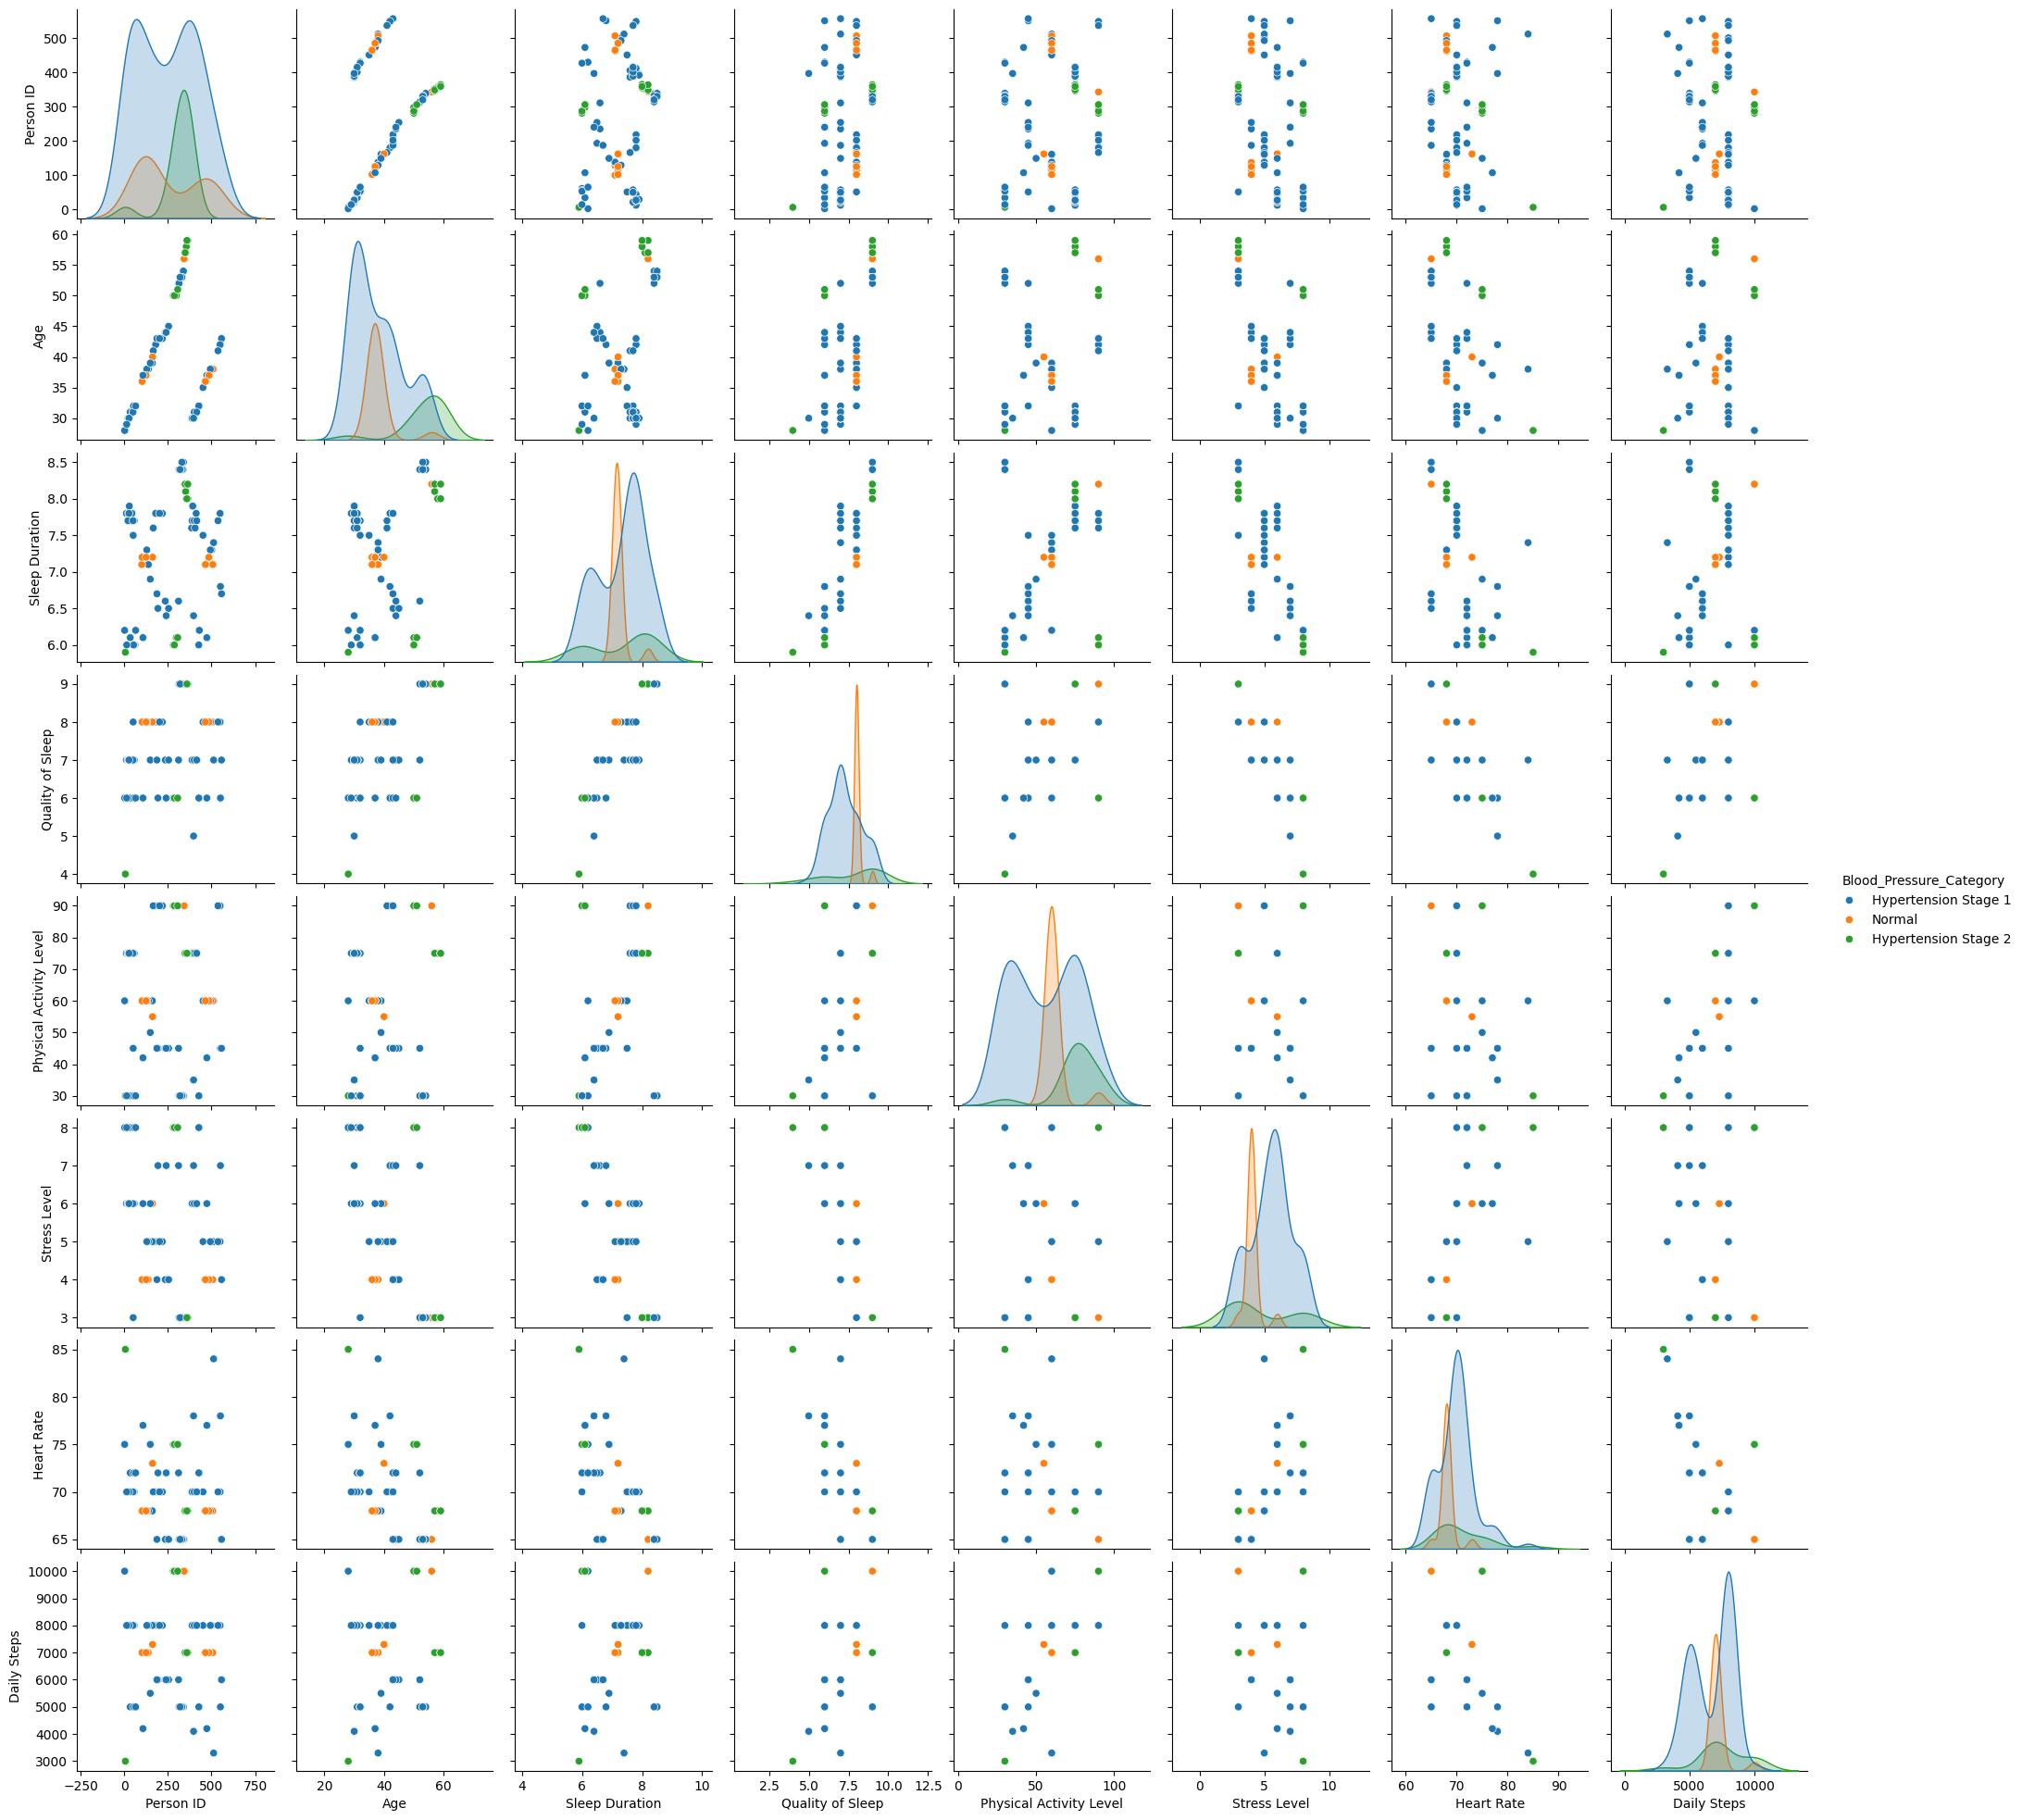

In [16]:
#data visualization
sample_data = data.sample(n=100)
sns.pairplot(sample_data, hue='Blood_Pressure_Category', diag_kind='kde')
plt.show()

In [17]:
# Plot Decision Trees
plt.figure(figsize=(20, 10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

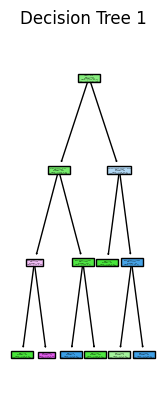

In [18]:
# Plot Decision Tree 1
plt.subplot(1, 3, 1)
plot_tree(model_dt1, filled=True, feature_names=X.columns, class_names=model_dt1.classes_)
plt.title('Decision Tree 1')
plt.show()

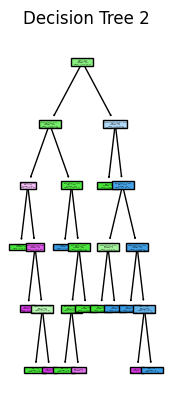

In [19]:
# Plot Decision Tree 2
plt.subplot(1, 3, 2)
plot_tree(model_dt2, filled=True, feature_names=X.columns, class_names=model_dt2.classes_)
plt.title('Decision Tree 2')
plt.show()

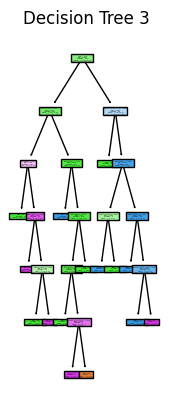

In [20]:
# Plot Decision Tree 3
plt.subplot(1, 3, 3)
plot_tree(model_dt3, filled=True, feature_names=X.columns, class_names=model_dt3.classes_)
plt.title('Decision Tree 3')
plt.show()